<a href="https://colab.research.google.com/github/DrPasidth/Thailand-IOT-4.0/blob/master/JackElonFaceRecognitionByKai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip -q -o /content/jackelonfaces.zip

In [2]:
import numpy as np
import os
import cv2
from joblib import dump,load
from sklearn.svm import SVC
from imutils import paths

In [3]:
imagePaths = list(paths.list_images("jackelonfaces"))
data = []
labels = []
#print(imagePaths)

for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]
	#print(label)
	if label == "elonmusk":
		label = 0
	else :
		label = 1
	image = cv2.imread(imagePath)
	resized = cv2.resize(image,(64,64))
	gray = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
	data.append(np.ravel(gray))
	labels.append(label)


labels = np.array(labels)
clf = SVC(kernel='linear',probability=True)
clf.fit(data,labels)
dump(clf,"jackelonsvmclassifier.lib")
print("Train Sucess")



Train Sucess


In [4]:
from google.colab.patches import cv2_imshow

In [5]:
faceCascades = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
svmClassifier = load("jackelonsvmclassifier.lib")

In [9]:
def face_detect(img,clf):
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  faces = faceCascades.detectMultiScale(gray,1.2,15)
  text = "None"
  for (x,y,w,h) in faces:
    faceset = []
    face = gray[y:y+h,x:x+w]
    face_resized = cv2.resize(face,(64,64))
    faceset.append(np.ravel(face_resized))
    pred = clf.predict(faceset)
    prob = clf.predict_proba(faceset)
    print(pred)
    print(prob)
    if pred == [0]:
      text = "Elon Musk"
    elif pred == [1]:
      text = "Jack Ma"
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    cv2.putText(img,text,(x,y-4),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,255),2)
  return img


In [10]:
image = cv2.imread("jackelon.jpg")
image = face_detect(image,svmClassifier)

[0]
[[0.9388357 0.0611643]]
[1]
[[0.18721989 0.81278011]]


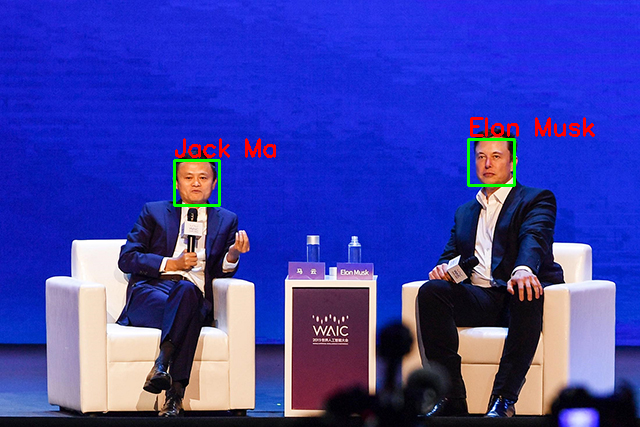

In [11]:
cv2_imshow(image)

In [12]:
image = cv2.imread("taksin.jpg")
image = face_detect(image,svmClassifier)

[1]
[[0.08562689 0.91437311]]


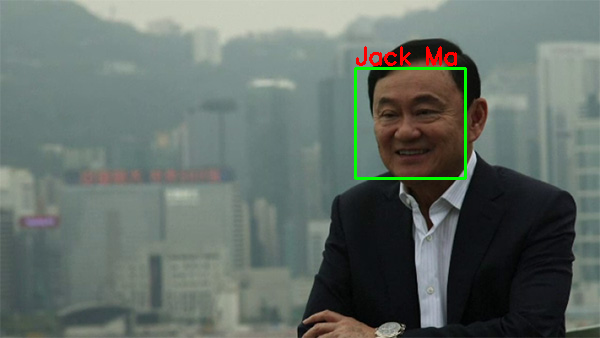

In [13]:
cv2_imshow(image)